##   UNITSADMISSIONS
הצגה גרפית של מספר הקבלות בכל יחידה לפי זמן

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys

sys.path.append('../')

In [2]:
os.getcwd()

'/home/michael/Projects/DSlab2/data-science2-lab-final-project/src/team_4'

In [3]:
# Load the provided Excel file
# The data is present in the data folder two directories up
data_dir = os.path.abspath(os.path.join(os.getcwd(),"..","data"))
dataset_path = os.path.join(data_dir, "rehospitalization.xlsx")

In [4]:
def summary(df):
    nonnans = df.shape[0] - df.isna().sum()
    nonnansPrc = (nonnans / df.shape[0] * 100).apply("{0:.2f}%".format)
    sam = df.sample(1, random_state=42).squeeze()
    res = pd.DataFrame([sam.index, df.dtypes.astype(str), nonnans,
                        nonnansPrc, df.nunique(), sam]).transpose()
    res.columns = ["Column", "data type", "non-null values", 
                   "non-null values %", "unique values", "example"]
    res.sort_values("unique values",ascending=False, inplace=True)
    return res

## Units Admissions 

In [5]:
# Load the 'unitsAdmissions' sheet into a DataFrame for EDA
units_admissions_df = pd.read_excel(dataset_path, sheet_name='unitsAdmissions')

# Display the first few rows to understand the structure of the data
units_admissions_df.head()

,תאריך,מחלקה,כמות קבלות
0,2020-01-01,4,7
1,2020-01-02,4,10
2,2020-01-03,4,9
3,2020-01-04,4,13
4,2020-01-05,4,15


In [6]:
summary(units_admissions_df)

,Column,data type,non-null values,non-null values %,unique values,example
0,תאריך,datetime64[ns],6701,100.00%,1461,2020-09-18 00:00:00
2,כמות קבלות,int64,6701,100.00%,23,9
1,מחלקה,int64,6701,100.00%,5,1


In [7]:
units_admissions_df.columns = ['Date', 'Unit', 'Admissions']
units_admissions_df

,Date,Unit,Admissions
0,2020-01-01,4,7
1,2020-01-02,4,10
2,2020-01-03,4,9
3,2020-01-04,4,13
4,2020-01-05,4,15
...,...,...,...
6696,2023-12-27,3,14
6697,2023-12-28,3,13
6698,2023-12-29,3,13
6699,2023-12-30,3,11


In [8]:
# Convert the date column to datetime for better handling
units_admissions_df['Date'] = pd.to_datetime(units_admissions_df['Date'])

# Summary statistics for the dataset
summary_stats = units_admissions_df.describe()

# Group by 'מחלקה' to get department-wise summary statistics
department_stats = units_admissions_df.groupby('Unit')['Admissions'].describe()

summary_stats, department_stats

(                                Date         Unit   Admissions
 count                           6701  6701.000000  6701.000000
 mean   2022-01-23 07:22:40.811819008     2.947918    11.210118
 min              2020-01-01 00:00:00     1.000000     1.000000
 25%              2021-01-29 00:00:00     2.000000     9.000000
 50%              2022-02-03 00:00:00     3.000000    11.000000
 75%              2023-01-30 00:00:00     4.000000    13.000000
 max              2023-12-31 00:00:00     5.000000    23.000000
 std                              NaN     1.404302     3.348427,
        count       mean       std  min  25%   50%   75%   max
 Unit                                                         
 1     1437.0  11.507307  3.321783  1.0  9.0  11.0  14.0  23.0
 2     1298.0  11.114792  3.457852  1.0  9.0  11.0  13.0  23.0
 3     1324.0  10.647281  3.316771  1.0  8.0  11.0  13.0  21.0
 4     1461.0  11.558522  3.185180  4.0  9.0  11.0  13.0  23.0
 5     1181.0  11.153260  3.402549  1.0  9.0 

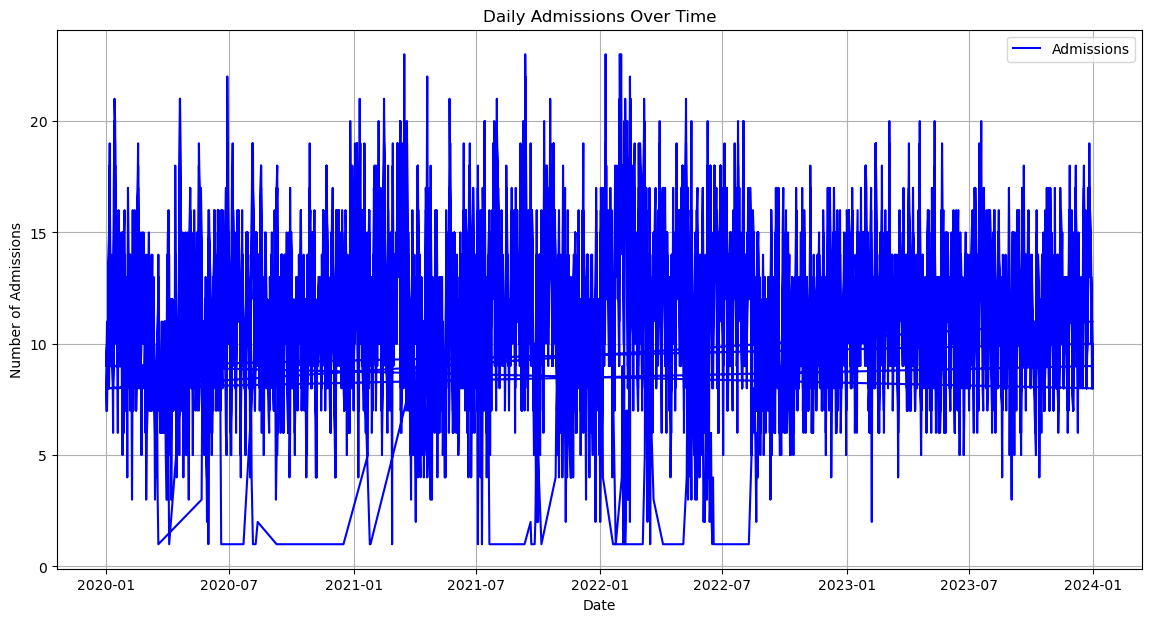

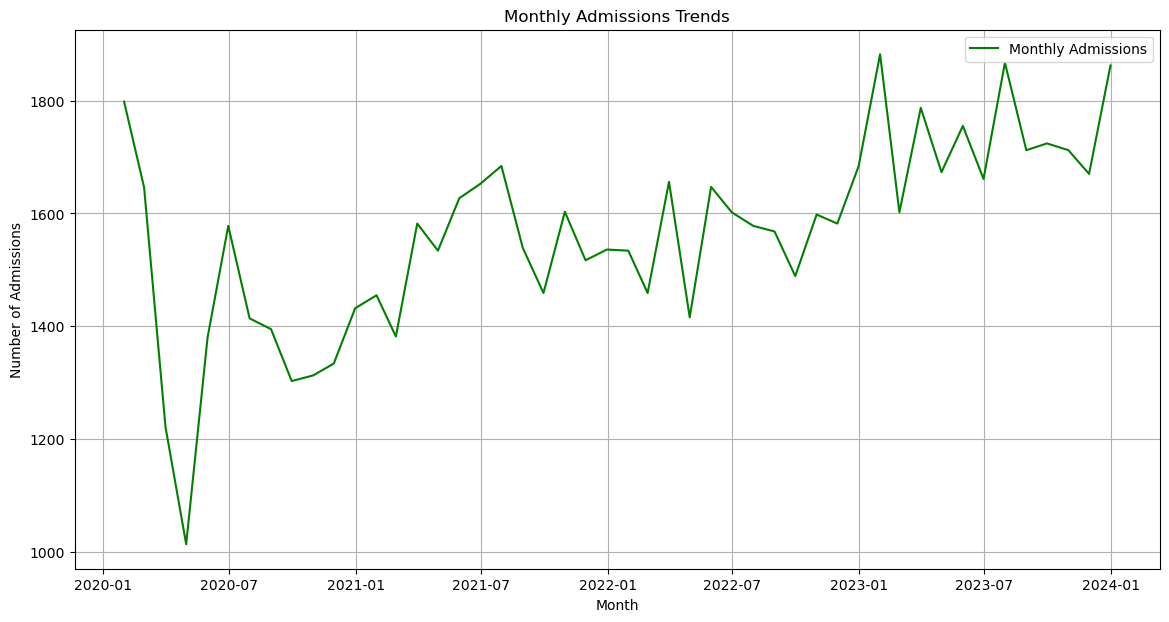

In [9]:
# Plotting the total admissions over time to identify trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(units_admissions_df['Date'], units_admissions_df['Admissions'], label='Admissions', color='blue')
plt.title('Daily Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend()
plt.show()

# Aggregating data by month to analyze monthly trends
monthly_trends = units_admissions_df.resample('ME', on='Date').sum()

# Plotting the monthly admissions trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends.index, monthly_trends['Admissions'], label='Monthly Admissions', color='green')
plt.title('Monthly Admissions Trends')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
#units_admissions_df.index = units_admissions_df.Date
units_admissions_monthly = units_admissions_df.groupby([pd.Grouper(key = "Date", freq='ME'),pd.Grouper(key="Unit")]).sum("Admissions")


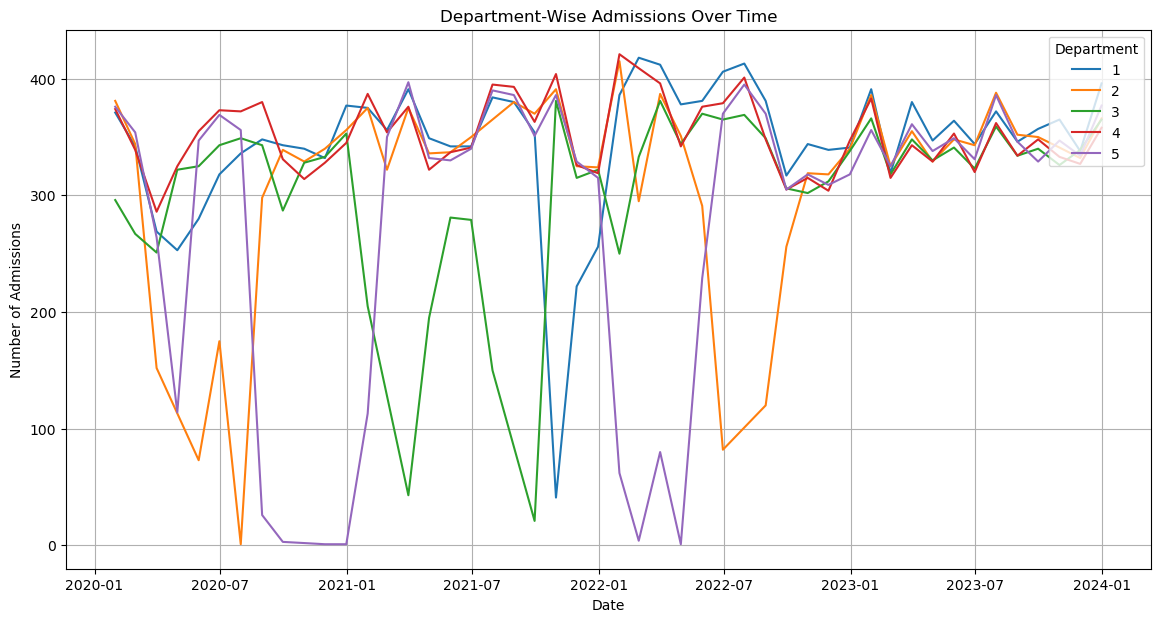

/tmp/ipykernel_1925049/2118155230.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Unit', y='Admissions', data=units_admissions_df, palette='tab10')


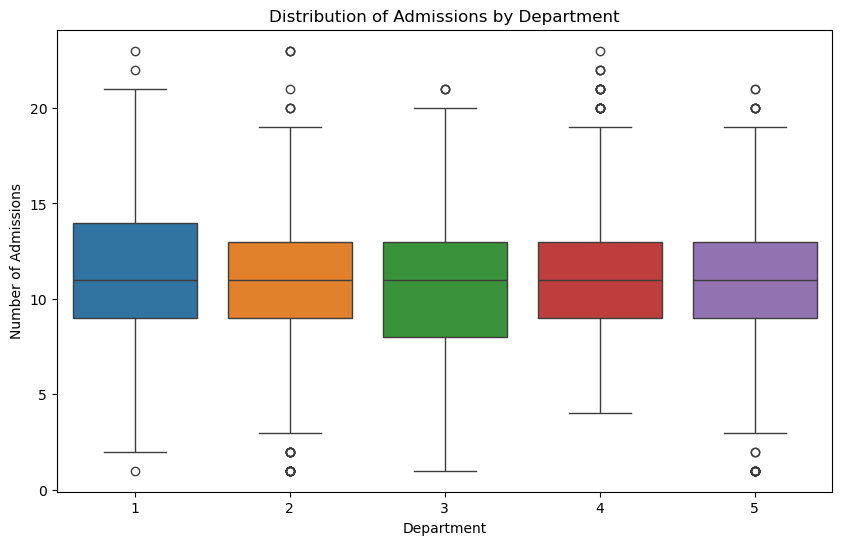

In [12]:
# Plotting department-wise admissions over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Admissions', hue='Unit', data=units_admissions_monthly, palette='tab10')
plt.title('Department-Wise Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend(title='Department', loc='upper right')
plt.show()

# Boxplot to compare admission distributions across departments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Unit', y='Admissions', data=units_admissions_df, palette='tab10')
plt.title('Distribution of Admissions by Department')
plt.xlabel('Department')
plt.ylabel('Number of Admissions')
plt.show()
